<a href="https://colab.research.google.com/github/2403a54127-lab/Natural-language-processing/blob/main/NLP_lab_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install gensim numpy pandas matplotlib scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 47.8 MB/s eta 0:00:00


Import Libraries

In [4]:
import numpy as np              # For numerical operations
import pandas as pd             # For handling data
import gensim.downloader as api # For loading pre-trained embeddings
from sklearn.manifold import TSNE  # For dimensionality reduction
import matplotlib.pyplot as plt    # For plotting graph


Load Pre-trained Model

In [5]:
model = api.load("glove-wiki-gigaword-100")

print("Vocabulary Size:", len(model))
print("\nExample vector for 'king':\n")
print(model["king"])


[==================================================] 100.0% 128.1/128.1MB downloaded
Vocabulary Size: 400000

Example vector for 'king':

[-0.32307  -0.87616   0.21977   0.25268   0.22976   0.7388   -0.37954
 -0.35307  -0.84369  -1.1113   -0.30266   0.33178  -0.25113   0.30448
 -0.077491 -0.89815   0.092496 -1.1407   -0.58324   0.66869  -0.23122
 -0.95855   0.28262  -0.078848  0.75315   0.26584   0.3422   -0.33949
  0.95608   0.065641  0.45747   0.39835   0.57965   0.39267  -0.21851
  0.58795  -0.55999   0.63368  -0.043983 -0.68731  -0.37841   0.38026
  0.61641  -0.88269  -0.12346  -0.37928  -0.38318   0.23868   0.6685
 -0.43321  -0.11065   0.081723  1.1569    0.78958  -0.21223  -2.3211
 -0.67806   0.44561   0.65707   0.1045    0.46217   0.19912   0.25802
  0.057194  0.53443  -0.43133  -0.34311   0.59789  -0.58417   0.068995
  0.23944  -0.85181   0.30379  -0.34177  -0.25746  -0.031101 -0.16285
  0.45169  -0.91627   0.64521   0.73281  -0.22752   0.30226   0.044801
 -0.83741   0.55006  -

Select 40 Words

In [6]:
words = [
    # Family
    "king","queen","man","woman","boy","girl","father","mother",

    # Animals
    "dog","cat","lion","tiger","elephant","wolf",

    # Countries & Cities
    "india","china","france","germany","delhi","paris","london","tokyo",

    # Technology
    "computer","laptop","mobile","internet","software","hardware",

    # Fruits
    "apple","banana","mango","orange","grape",

    # Vehicles
    "car","bus","train","airplane","bicycle"
]


Extract Word Vectors

In [13]:
word_vectors = np.array([model[word] for word in words])

print("Shape of vectors:", word_vectors.shape)


Shape of vectors: (38, 100)


Apply t-SNE

In [12]:
tsne = TSNE(n_components=2, random_state=42, perplexity=10)
reduced_vectors = tsne.fit_transform(word_vectors)

print("New shape:", reduced_vectors.shape)


New shape: (38, 2)


Plot the Visualization

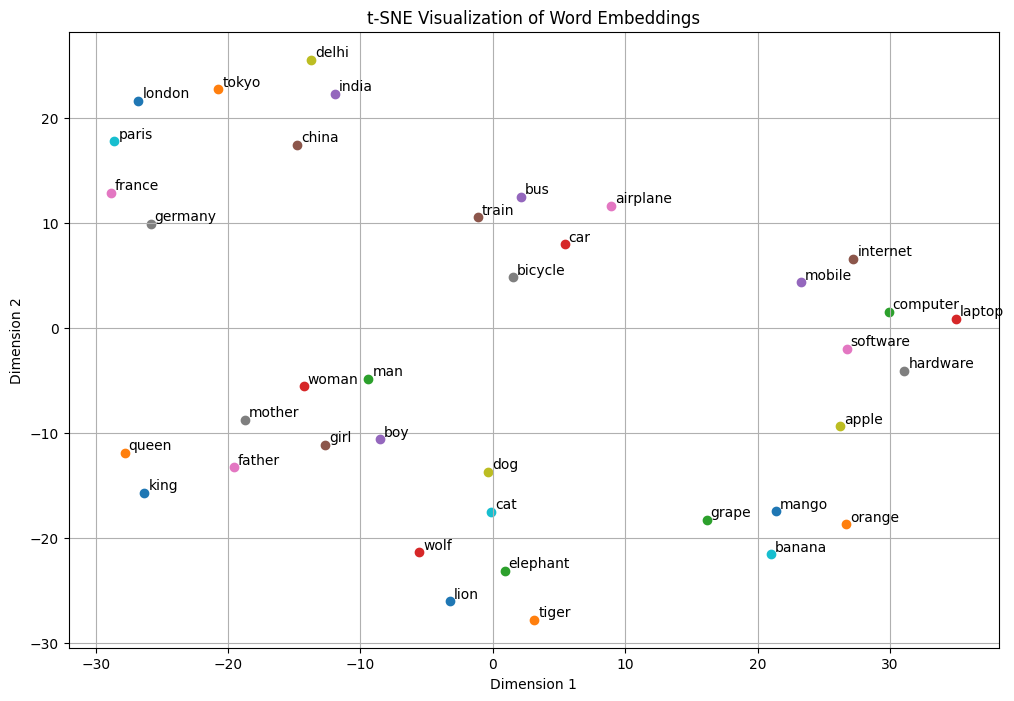

In [10]:
plt.figure(figsize=(12, 8))

for i, word in enumerate(words):
    x = reduced_vectors[i, 0]
    y = reduced_vectors[i, 1]
    plt.scatter(x, y)
    plt.text(x+0.3, y+0.3, word)

plt.title("t-SNE Visualization of Word Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()
